# **Helsinki City Bike Network Analysis**

> Mini Project 3

  > Ammara Asif





**Steps to run the notebook**

---




1. Download the data set from given link: https://www.kaggle.com/datasets/geometrein/helsinki-city-bikes
2. It will download in zip format, unarchive the folder and upload the file "database.csv"

Note: After uploading the data set or re running the notebook, give it a few minutes so that data can be properly read. If run quickly, it might perform analysis on limited data, leading to incorrect results.

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [44]:
df = pd.read_csv("database.csv", low_memory=False)
df.head()

departure               return  departure_id    departure_name  \
0  2020-03-23 06:09:44  2020-03-23 06:16:26          86.0          Kuusitie   
1  2020-03-23 06:11:58  2020-03-23 06:26:31          26.0        Kamppi (M)   
2  2020-03-23 06:16:29  2020-03-23 06:24:23         268.0  Porolahden koulu   
3  2020-03-23 06:33:53  2020-03-23 07:14:03         751.0        Vallipolku   
4  2020-03-23 06:36:09  2020-03-23 07:04:10          62.0  Länsisatamankatu   

   return_id       return_name  distance (m)  duration (sec.)  \
0      111.0     Esterinportti        1747.0            401.0   
1       10.0       Kasarmitori        1447.0            869.0   
2      254.0       Agnetankuja        1772.0            469.0   
3      106.0   Korppaanmäentie        7456.0           2406.0   
4      121.0  Vilhonvuorenkatu        7120.0           1679.0   

   avg_speed (km/h)  departure_latitude  departure_longitude  return_latitude  \
0          0.261397           60.195245            24.901900        60.197572   
1          0.099908           60.168610            24.930537        60.165017   
2          0.226695           60.195540            25.053581        60.187234   
3          0.185935           60.227827            24.819614        60.203474   
4          0.254437           60.158928            24.909692        60.186463   

   return_longitude  Air temperature (degC)  
0         24.926781                     0.9  
1         24.949473                     0.9  
2         25.036412                     0.9  
3         24.898930                     0.9  
4         24.967872                     0.9

## **Preprocessing**

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864131 entries, 0 to 864130
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   departure               864131 non-null  object 
 1   return                  864131 non-null  object 
 2   departure_id            864130 non-null  float64
 3   departure_name          864130 non-null  object 
 4   return_id               864130 non-null  float64
 5   return_name             864130 non-null  object 
 6   distance (m)            864130 non-null  float64
 7   duration (sec.)         864130 non-null  float64
 8   avg_speed (km/h)        864043 non-null  float64
 9   departure_latitude      864130 non-null  float64
 10  departure_longitude     864130 non-null  float64
 11  return_latitude         864130 non-null  float64
 12  return_longitude        864130 non-null  float64
 13  Air temperature (degC)  864070 non-null  float64
dtypes: float64(10), obje

We can see data type of departure and return is object instead of date type so we will change the data type of these two columns.

In [46]:
df[['departure','return']] =  df[['departure','return']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S.%f')

For easy accessibility, we can modify the column names and drop the units in distance, duration and avg_speed columns.

In [47]:
df = df.rename(columns={'distance (m)': 'distance',
                                     'duration (sec.)': 'duration',
                                     'avg_speed (km/h)':'speed',
                                      'Air temperature (degC)':'temperature',
                                     })

In [48]:
df.head()

departure              return  departure_id    departure_name  \
0 2020-03-23 06:09:44 2020-03-23 06:16:26          86.0          Kuusitie   
1 2020-03-23 06:11:58 2020-03-23 06:26:31          26.0        Kamppi (M)   
2 2020-03-23 06:16:29 2020-03-23 06:24:23         268.0  Porolahden koulu   
3 2020-03-23 06:33:53 2020-03-23 07:14:03         751.0        Vallipolku   
4 2020-03-23 06:36:09 2020-03-23 07:04:10          62.0  Länsisatamankatu   

   return_id       return_name  distance  duration     speed  \
0      111.0     Esterinportti    1747.0     401.0  0.261397   
1       10.0       Kasarmitori    1447.0     869.0  0.099908   
2      254.0       Agnetankuja    1772.0     469.0  0.226695   
3      106.0   Korppaanmäentie    7456.0    2406.0  0.185935   
4      121.0  Vilhonvuorenkatu    7120.0    1679.0  0.254437   

   departure_latitude  departure_longitude  return_latitude  return_longitude  \
0           60.195245            24.901900        60.197572         24.926781   
1           60.168610            24.930537        60.165017         24.949473   
2           60.195540            25.053581        60.187234         25.036412   
3           60.227827            24.819614        60.203474         24.898930   
4           60.158928            24.909692        60.186463         24.967872   

   temperature  
0          0.9  
1          0.9  
2          0.9  
3          0.9  
4          0.9

In [49]:
df.describe()

departure_id      return_id       distance      duration  \
count  864130.000000  864130.000000  864130.000000  8.641300e+05   
mean      174.201904     174.167067    2588.993071  1.045411e+03   
std       193.003412     193.396455    1970.207030  8.280547e+03   
min         1.000000       1.000000       0.000000  0.000000e+00   
25%        45.000000      45.000000    1233.000000  4.210000e+02   
50%       107.000000     106.000000    2177.000000  7.190000e+02   
75%       218.000000     219.000000    3577.000000  1.147000e+03   
max       901.000000     901.000000  359383.330000  5.012669e+06   

               speed  departure_latitude  departure_longitude  \
count  864043.000000       864130.000000        864130.000000   
mean        0.184847           60.184366            24.920234   
std         0.067132            0.019233             0.067082   
min         0.000000           60.147921            24.721367   
25%         0.155917           60.168610            24.891682   
50%         0.193755           60.183718            24.930537   
75%         0.226992           60.197489            24.955462   
max         0.500012           60.239109            25.106199   

       return_latitude  return_longitude    temperature  
count    864130.000000     864130.000000  864070.000000  
mean         60.184252         24.920277      10.155592  
std           0.019264          0.067281       4.593856  
min          60.147921         24.721367      -5.200000  
25%          60.168610         24.891682       6.600000  
50%          60.183164         24.930537       9.600000  
75%          60.197489         24.955558      13.900000  
max          60.239109         25.106199      20.700000

Observing the data reveals some irregularities, such as negative values and unusually high distances. Understanding the context in which the data was collected is crucial to identify and remove these anomalies effectively.

**Irregular Distance:**
1. Distance can not be negative
2. According to the sources of data collectors, the stations are always positioned more than 50 meters away therefore if the trip is less than 50 meters it is an irregularity.
3. The data which include distance above 15 km or 15000 m may be outliers

**Irregular Duration:**
1. According to the sources, the maximum rental time for a bike is 5 hours (18000 seconds) so rides above this distance can be removed.

Based on these assumptions the dataset can be filtered like this:

In [50]:
df = df[  (50 < df['distance']) & (df['distance'] < 15000) &
 (120 < df['duration']) & (df['duration'] <  18000)
      ]

Adding a column of hour to make it more understanable

In [51]:
def seconds_to_hours(seconds):
    hours = seconds / 3600
    return hours

In [52]:
df['duration']=df['duration'].apply(seconds_to_hours)

In [53]:
# hour for departure
df['hour_of_day']=df['departure'].dt.hour


In [54]:
df['weekday']=df['departure'].dt.weekday

In [55]:
df.head()

departure              return  departure_id    departure_name  \
0 2020-03-23 06:09:44 2020-03-23 06:16:26          86.0          Kuusitie   
1 2020-03-23 06:11:58 2020-03-23 06:26:31          26.0        Kamppi (M)   
2 2020-03-23 06:16:29 2020-03-23 06:24:23         268.0  Porolahden koulu   
3 2020-03-23 06:33:53 2020-03-23 07:14:03         751.0        Vallipolku   
4 2020-03-23 06:36:09 2020-03-23 07:04:10          62.0  Länsisatamankatu   

   return_id       return_name  distance  duration     speed  \
0      111.0     Esterinportti    1747.0  0.111389  0.261397   
1       10.0       Kasarmitori    1447.0  0.241389  0.099908   
2      254.0       Agnetankuja    1772.0  0.130278  0.226695   
3      106.0   Korppaanmäentie    7456.0  0.668333  0.185935   
4      121.0  Vilhonvuorenkatu    7120.0  0.466389  0.254437   

   departure_latitude  departure_longitude  return_latitude  return_longitude  \
0           60.195245            24.901900        60.197572         24.926781   
1           60.168610            24.930537        60.165017         24.949473   
2           60.195540            25.053581        60.187234         25.036412   
3           60.227827            24.819614        60.203474         24.898930   
4           60.158928            24.909692        60.186463         24.967872   

   temperature  hour_of_day  weekday  
0          0.9            6        0  
1          0.9            6        0  
2          0.9            6        0  
3          0.9            6        0  
4          0.9            6        0

## **EDA**

In [56]:
df.groupby(['departure_name'])['departure_name'].count().sort_values(ascending=False)

departure_name
Itämerentori              15114
Kalasatama (M)            13257
Ympyrätalo                11507
Pasilan asema              9236
Töölönlahdenkatu           8501
                          ...  
Hagalundinpuisto            184
Käskynhaltijantie           181
Itäkeskus Metrovarikko      150
Gransinmäki                 147
Kutsuntatie                 125
Name: departure_name, Length: 346, dtype: int64

Itämerentori is the most common departure station

In [57]:
df.groupby(['return_name'])['return_name'].count().sort_values(ascending=False)

return_name
Itämerentori              15398
Kalasatama (M)            14061
Ympyrätalo                12098
Töölönlahdenkatu           8943
Arabian kauppakeskus       8676
                          ...  
Käskynhaltijantie           181
Gransinmäki                 164
Itäkeskus Metrovarikko      150
Kutsuntatie                 141
Hagalundinpuisto            139
Name: return_name, Length: 346, dtype: int64

Itämerentori is the most common return station

<Axes: xlabel='hour_of_day'>

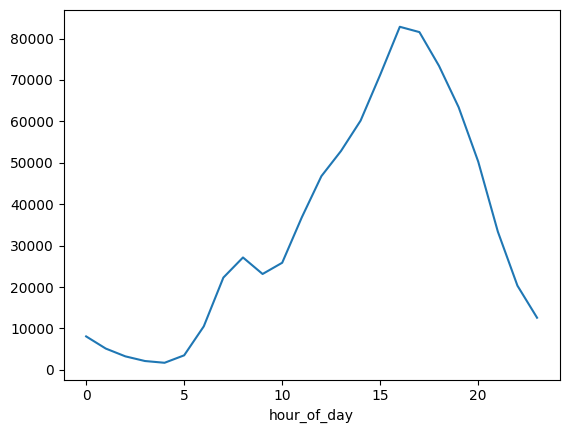

In [58]:
df.groupby(['hour_of_day'])['hour_of_day'].count().plot()

People usually leave at around 15th or 16th hour of day or 3 to 4 pm




<Axes: xlabel='weekday'>

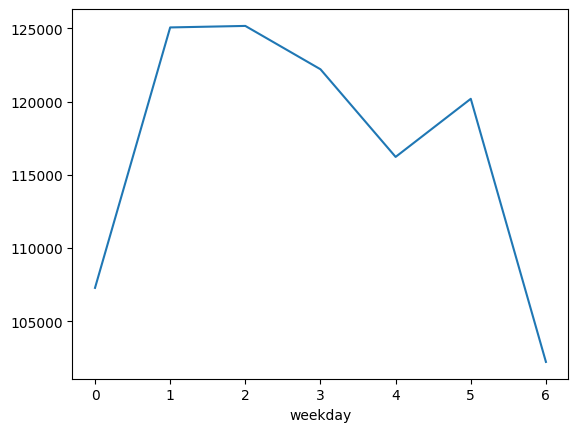

In [59]:
df.groupby(['weekday'])['weekday'].count().plot()

The most common day for travel via bikes is 2 or Wednesday
where 0 is monday and 6 is sunday

<Axes: xlabel='temperature'>

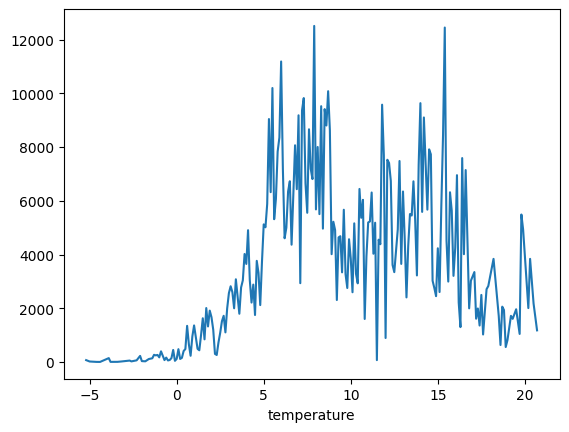

In [60]:
df.groupby(['temperature'])['temperature'].count().plot()

The most common temperature in which people used bicycles in helsinki is around 17 degree celsius

In [61]:

def display_top_departure_stations(data):
    modified_data = data.copy()
    modified_data = modified_data[modified_data['departure'].dt.year == 2020]
    plt.figure(figsize=(20, 9))
    departure_station_countplot = sns.countplot(x="departure_name", color="blue", data=modified_data,
                                                order=modified_data['departure_name'].value_counts().index)

    departure_station_countplot.set_xticklabels(departure_station_countplot.get_xticklabels(), rotation=40, ha="right")
    plt.xlabel("Departure Stations", fontsize=12, x=0.5)
    plt.ylabel("Total Departures", fontsize=12)
    plt.xlim(-1, 20.5)

    plt.grid(linestyle=":", color='grey')



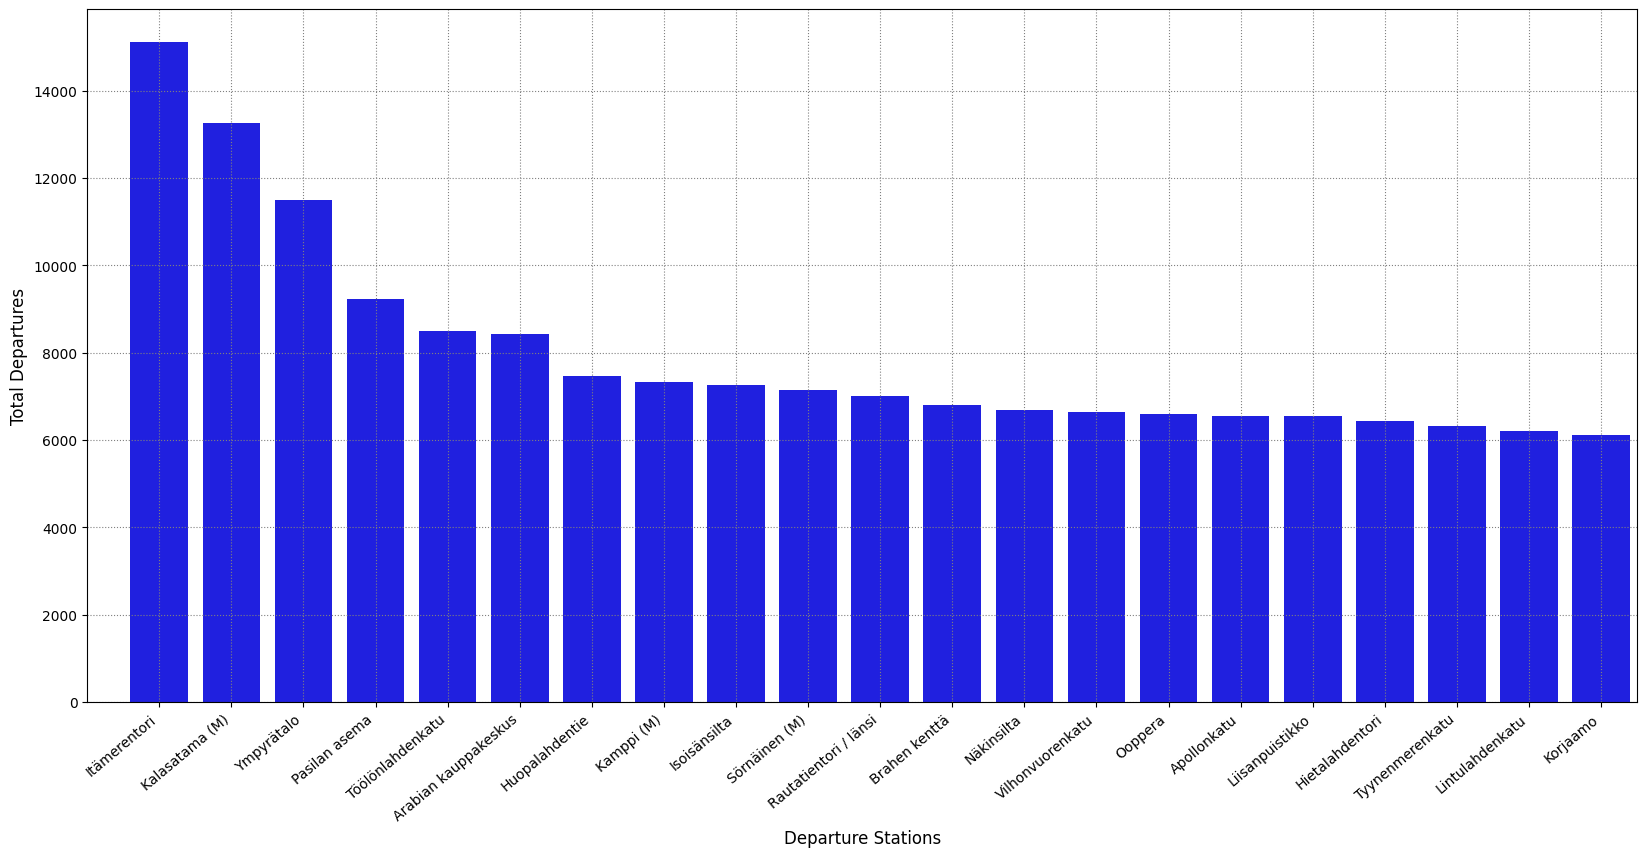

In [62]:
display_top_departure_stations(df)

The most popular station is Itämerentori in 2020

In [63]:
# eda trips over time

## Network Construction

In [64]:
import networkx as nx
import matplotlib.pyplot as plt


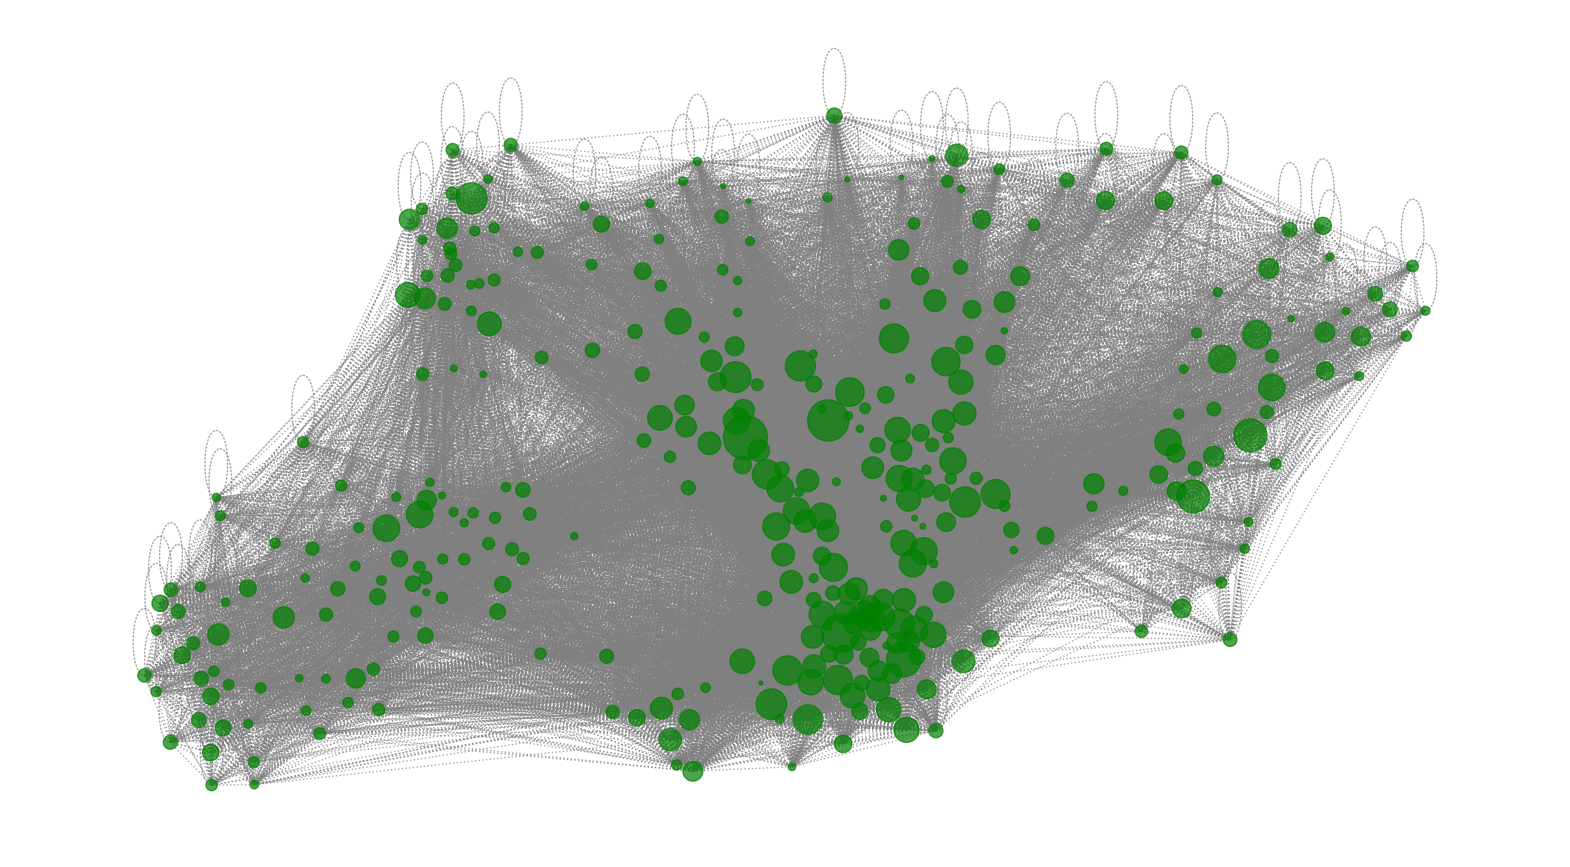

In [65]:
def visualize_bike_stations(data, selected_year=2020):
    data_filtered = data[data['departure'].dt.year == selected_year].dropna()
    bike_network = nx.from_pandas_edgelist(
        data_filtered,
        source='departure_name',
        target='return_name',
        edge_attr=['duration', 'distance']
    )
    plt.figure(figsize=(20, 11))
    ax = plt.gca()

    # Load station coordinates
    stations = pd.read_csv("https://raw.githubusercontent.com/Geometrein/helsinki-city-bikes/main/data/downloaded_data/station_coordinates.csv")
    stations.set_index('name', inplace=True)
    station_positions = {station: (row['longitude'], row['latitude']) for station, row in stations.iterrows()}

    for station, position in station_positions.items():
        if station in bike_network:
            bike_network.nodes[station]['pos'] = position

    node_sizes = data_filtered['departure_name'].value_counts() / 15
    nx.draw_networkx_nodes(
        bike_network,
        pos=nx.get_node_attributes(bike_network, 'pos'),
        node_size=node_sizes,
        node_color='green',
        alpha=0.7
    )
    nx.draw_networkx_edges(
        bike_network,
        pos=nx.get_node_attributes(bike_network, 'pos'),
        style='dotted',
        edge_color='gray',
        alpha=0.7
    )
    ax.axis('off')

    plt.show()
    return bike_network

bike_network_graph = visualize_bike_stations(df)



The nodes represent stations and are sized based on their usage frequency, and edges are styled with a dotted line.

## Descriptive Analysis

### Basic Info

In [66]:
print('Number of nodes', len(bike_network_graph.nodes))
print('Number of edges', len(bike_network_graph.edges))


Number of nodes 346
Number of edges 25362


### Density

In [67]:
density = nx.density(bike_network_graph)
print("Network density:", density)

Network density: 0.42493088715757726


### Degree Distributions

In [68]:
print('Average degree', sum(dict(bike_network_graph.degree).values()) / len(bike_network_graph.nodes))

Average degree 146.60115606936415


In [69]:
degree_dict = dict(bike_network_graph.degree(bike_network_graph.nodes()))
nx.set_node_attributes(bike_network_graph, degree_dict, 'degree')

sorted_degree = sorted(degree_dict.items(), reverse=True)
print(sorted_degree)

[('Ympyrätalo', 235), ('Yhdyskunnankuja', 114), ('Westendintie', 101), ('Westendinasema', 134), ('Von Daehnin katu', 76), ('Voikukantie', 77), ('Vilhonvuorenkatu', 219), ('Viiskulma', 175), ('Viikin tiedepuisto', 151), ('Viikin normaalikoulu', 120), ('Vihdintie', 216), ('Vesakkotie', 159), ('Verkatehtaanpuisto', 196), ('Venttiilikuja', 220), ('Velodrominrinne', 195), ('Varsapuistikko', 213), ('Vanha kirkkopuisto', 185), ('Vanha Viertotie', 178), ('Vanha Kauppahalli', 141), ('Vallipolku', 74), ('Vallilan\xa0varikko', 170), ('Vallikatu', 63), ('Valimotie', 168), ('Valimon asema', 137), ('Urheilupuisto (M)', 136), ('Upseerinkatu', 83), ('Unioninkatu', 177), ('Ulvilantie', 176), ('Uimastadion', 190), ('Töölöntulli', 238), ('Töölöntori', 203), ('Töölönlahdenkatu', 211), ('Töölönlahden puisto', 199), ('Töölönkatu', 201), ('Tyynenmerenkatu', 174), ('Tuulimäki', 88), ('Tupasaarentie', 127), ('Tunnelitie', 196), ('Tulisuontie', 93), ('Torpanranta', 199), ('Toppelundintie', 82), ('Toppelundinpor

We can see that Ympyrätalo has the highest degree.

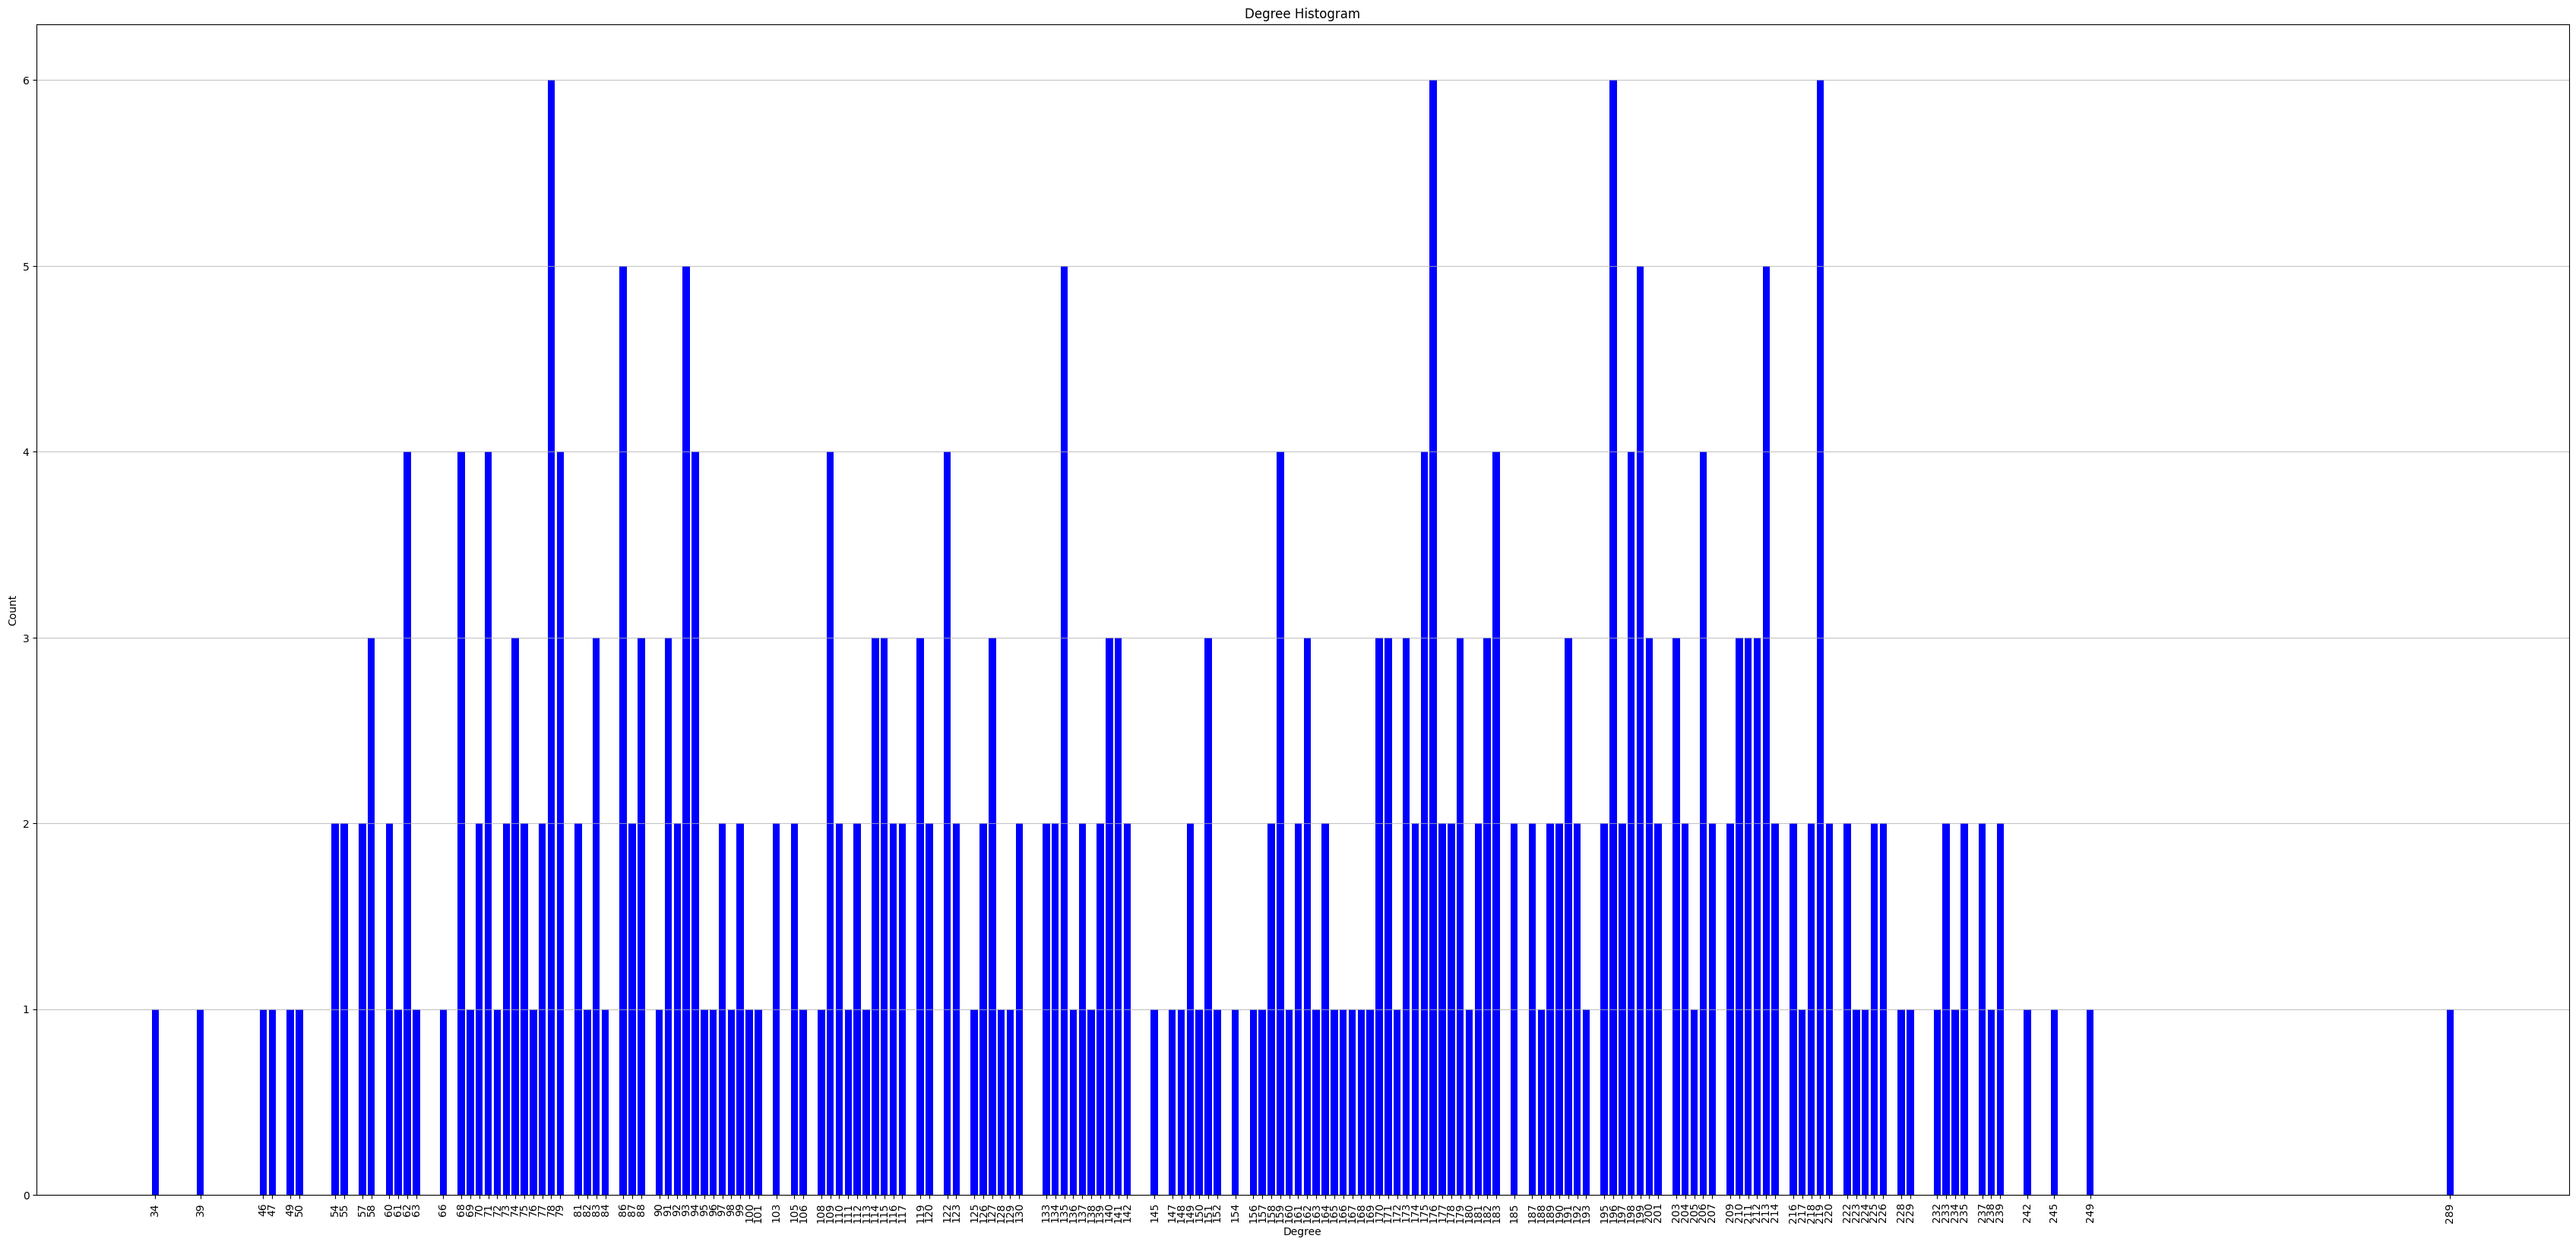

In [70]:
import collections

degrees = [degree for node, degree in nx.degree(bike_network_graph)]

degree_count = collections.Counter(degrees)
deg, cnt = zip(*degree_count.items())

plt.figure(figsize=(43, 20))
plt.bar(deg, cnt, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xticks([d for d in deg], rotation=90)
plt.yticks([i for i in range(0, max(cnt)+1)])
plt.grid(axis='y', alpha=0.75)
plt.show()


Some insights:
1. The most common degree is 218
2. Highest degree is 317
3. Lowest Degree is 55

### Centrality Measures

In [71]:
# Degree Centrality
degree_centrality = nx.degree_centrality(bike_network_graph)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(bike_network_graph)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(bike_network_graph)

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(bike_network_graph, max_iter=1000)

# PageRank
pagerank = nx.pagerank(bike_network_graph)

# Harmonic Centrality
harmonic_centrality = nx.harmonic_centrality(bike_network_graph)

# Print results (for example, Degree Centrality)
print("Degree Centrality:", degree_centrality)
print("Closeness Centrality:", closeness_centrality)
print("Betweenness Centrality:", betweenness_centrality)
print("Eigenvector Centrality:", eigenvector_centrality)
print("PageRank", pagerank)
print("Harmonic Centrality:", harmonic_centrality)

Degree Centrality: {'Kuusitie': 0.6492753623188405, 'Esterinportti': 0.6434782608695653, 'Kamppi (M)': 0.591304347826087, 'Kasarmitori': 0.4753623188405797, 'Porolahden koulu': 0.3333333333333333, 'Agnetankuja': 0.30434782608695654, 'Vallipolku': 0.2144927536231884, 'Korppaanmäentie': 0.5420289855072464, 'Länsisatamankatu': 0.5681159420289855, 'Vilhonvuorenkatu': 0.6347826086956522, 'Radiokatu': 0.5362318840579711, 'Porthania': 0.5420289855072464, 'Tyynenmerenkatu': 0.5043478260869565, 'Hietalahdentori': 0.5507246376811594, 'Itämerentori': 0.7014492753623188, 'Meilahden sairaala': 0.6347826086956522, 'Koskelantie': 0.6057971014492753, 'Kalasatama (M)': 0.6782608695652174, 'Rautatieläisenkatu': 0.591304347826087, 'A.I. Virtasen aukio': 0.4579710144927536, 'Töölönkatu': 0.5826086956521739, 'Rautatientori / itä': 0.5971014492753624, 'Roihupelto': 0.263768115942029, 'Siilitie (M)': 0.31884057971014496, 'Hakaniemi (M)': 0.6347826086956522, 'Rajasaarentie': 0.6115942028985507, 'Näkinsilta': 

In [72]:
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
sorted_harmonic_centrality = sorted(harmonic_centrality.items(), key=lambda x: x[1], reverse=True)

# Top 5 nodes for each centrality measure
top_5_degree = sorted_degree_centrality[:5]
top_5_closeness = sorted_closeness_centrality[:5]
top_5_betweenness = sorted_betweenness_centrality[:5]
top_5_eigenvector = sorted_eigenvector_centrality[:5]
top_5_pagerank = sorted_pagerank[:5]
top_5_harmonic = sorted_harmonic_centrality[:5]

print('Top 5 Nodes by Degree Centrality',top_5_degree)
print('Top 5 Nodes by Closeness Centrality',top_5_closeness)
print('Top 5 Nodes by Betweenness Centrality',top_5_betweenness)
print('Top 5 Nodes by Eigen Vector Centrality',top_5_eigenvector)
print('Top 5 Nodes by PageRank',top_5_pagerank)
print('Top 5 Nodes by Harmonic Centrality',top_5_harmonic)




Top 5 Nodes by Degree Centrality [('Haukilahdenkatu', 0.8376811594202899), ('Laajalahden aukio', 0.7217391304347827), ('Huopalahdentie', 0.7101449275362319), ('Itämerentori', 0.7014492753623188), ('Tilkanvierto', 0.6927536231884058)]
Top 5 Nodes by Closeness Centrality [('Haukilahdenkatu', 0.8560794044665012), ('Laajalahden aukio', 0.7787810383747178), ('Huopalahdentie', 0.7718120805369127), ('Itämerentori', 0.7666666666666667), ('Tilkanvierto', 0.7615894039735099)]
Top 5 Nodes by Betweenness Centrality [('Haukilahdenkatu', 0.03723820658570015), ('Itämerentori', 0.009244199192940075), ('Lauttasaaren ostoskeskus', 0.008800396619170734), ('Laajalahden aukio', 0.007374369996872744), ('Kalasatama (M)', 0.0069762546910418196)]
Top 5 Nodes by Eigen Vector Centrality [('Haukilahdenkatu', 0.0866166180518171), ('Linnanmäki', 0.08313337596437376), ('Töölöntulli', 0.08293791591413367), ('Ympyrätalo', 0.08217278858479303), ('Laajalahden aukio', 0.08195066230509139)]
Top 5 Nodes by PageRank [('Hauk

The top nodes by degree centrality have the highest number of direct connections to other nodes. This indicates that they are highly active or popular within the network, directly interacting with many other nodes. Haukilahdenkatu is the most active node.

Nodes with high closeness centrality can quickly interact with all others because they are, on average, closer to all other nodes in the network. This suggests they can efficiently spread information or influence throughout the network. Haukilahdenkatu is the node with most closeness centrality.

Nodes with high betweenness centrality often lie on the shortest paths between other nodes. This positions them as critical bridges or connectors within the network, controlling the flow of information or resources. We can see that Haukilahdenkatu node has maximum betweenenss centrality.

High eigenvector centrality indicates that a node is connected to many other nodes who themselves have high scores. It implies a form of influence or prestige, where a node is important if it is linked to other important nodes. We can see that Haukilahdenkatu has most influence.

PageRank considers the importance of a node's connections. A node with a high PageRank score is linked by many nodes, and those nodes themselves are important. Haukilahdenkatu has the highest page rank.

Nodes with high harmonic centrality are close to all other nodes when considering the inverse of the shortest path distances. This centrality measure is particularly useful in networks where the path lengths are important, as it sums the reciprocal of the shortest path lengths to each node. Again Haukilahdenkatu has the highest harmonic centrality

In [73]:
directed_graph = nx.from_pandas_edgelist(df, 'departure_id', 'return_id', create_using=nx.DiGraph())
is_strongly_connected = nx.is_strongly_connected(directed_graph)
print(f"The network is strongly connected: {is_strongly_connected}")

strongly_connected_components = nx.number_strongly_connected_components(directed_graph)
print(f"Number of strongly connected components: {strongly_connected_components}")


The network is strongly connected: True
Number of strongly connected components: 1


Here we created a directed graph from data frame to see if it is highly connected and it was.

## Pattern Recongnition

### Shortest Path Between Alll Nodes

In [74]:
nx.floyd_warshall(bike_network_graph)

{'Kuusitie': defaultdict(<function networkx.algorithms.shortest_paths.dense.floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda>()>,
             {'Kuusitie': 0,
              'Esterinportti': 1.0,
              'Kauppakorkeakoulu': 1.0,
              'Kiskontie': 1.0,
              'Töölöntori': 1.0,
              'Eteläinen Hesperiankatu': 1.0,
              'Vanha kirkkopuisto': 1.0,
              'Nordenskiöldinaukio': 1.0,
              'Korjaamo': 1.0,
              'Rautatieläisenkatu': 1.0,
              'Stenbäckinkatu': 1.0,
              'Kiasma': 1.0,
              'Tilkanvierto': 1.0,
              'Kapteeninpuistikko': 1.0,
              'Linnanmäki': 1.0,
              'Brahen kenttä': 1.0,
              'Töölönlahdenkatu': 1.0,
              'Elimäenkatu': 1.0,
              'Keilaranta': 1.0,
              'Töölönkatu': 1.0,
              'Kasarmitori': 1.0,
              'Huopalahdentie': 1.0,
              'Rautatientori / länsi': 1.0,
        

We can see shortest paths between all nodes through this algorithm


### Daily Bike Rides

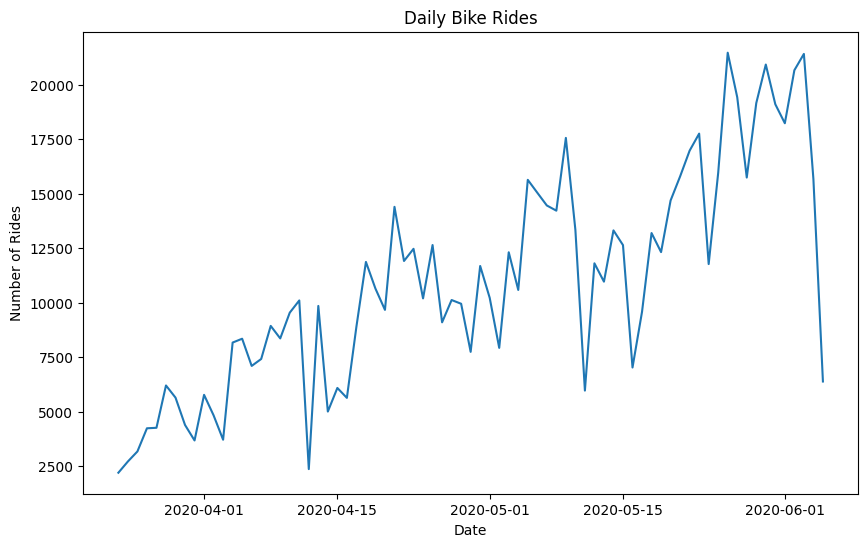

In [75]:
df['date'] = df['departure'].dt.date
daily_rides = df.groupby('date').size()


plt.figure(figsize=(10, 6))
plt.plot(daily_rides.index, daily_rides.values)
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Daily Bike Rides')
plt.show()


The top daily bike rides are shown as matplotlib compresses date ranges due to data size

### Most common routes

In [76]:
# Example: Finding most common routes
df['route'] = df['departure_name'] + ' to ' + df['return_name']
common_routes = df['route'].value_counts().head(10)

print("Most Common Routes:")
print(common_routes)


Most Common Routes:
Aalto-yliopisto (M), Korkeakouluaukio to Jämeräntaival    2426
Jämeräntaival to Aalto-yliopisto (M), Korkeakouluaukio    2414
Kirjurinkuja to Leppävaaranaukio                          1158
Leppävaaranaukio to Kirjurinkuja                          1125
Haukilahdenkatu to Kalasatama (M)                          976
Kalasatama (M) to Haukilahdenkatu                          973
Itämerentori to Tyynenmerenkatu                            919
Tyynenmerenkatu to Itämerentori                            897
Itämerentori to Länsisatamankuja                           886
Länsisatamankuja to Itämerentori                           863
Name: route, dtype: int64


### Motif Detection

In [77]:
from collections import defaultdict
import itertools

for index, row in df.iterrows():
    bike_network_graph.add_edge(row['departure_id'], row['return_id'])

# Define a function to find all triplets (3-node subgraphs) in the graph
def find_triplets(graph):
    triplets = []
    for node in graph:
        # For each node, look at all pairs of its neighbors
        neighbors = set(graph.neighbors(node))
        for pair in itertools.combinations(neighbors, 2):
            # Check if this pair of neighbors is connected to form a triplet
            if graph.has_edge(pair[0], pair[1]) or graph.has_edge(pair[1], pair[0]):
                triplet = sorted([node, pair[0], pair[1]])
                triplets.append(tuple(triplet))
    return triplets

# Find all triplets in the graph
all_triplets = find_triplets(bike_network_graph)

# Count the frequency of each triplet
triplet_frequency = defaultdict(int)
for triplet in all_triplets:
    triplet_frequency[triplet] += 1

# Sort triplets by frequency
sorted_triplets = sorted(triplet_frequency.items(), key=lambda item: item[1], reverse=True)

# Print the most frequent triplets
for triplet, frequency in sorted_triplets[:5]:  # Just the top 5
    print(f"Triplet: {triplet}, Frequency: {frequency}")


Triplet: ('Hakalehto', 'Kuusitie', 'Töölöntulli'), Frequency: 3
Triplet: ('Hämeenlinnanväylä', 'Kuusitie', 'Töölöntulli'), Frequency: 3
Triplet: ('Kuusitie', 'Töölöntulli', 'Vanha Viertotie'), Frequency: 3
Triplet: ('Keilaranta', 'Kuusitie', 'Töölöntulli'), Frequency: 3
Triplet: ('Huopalahdentie', 'Kuusitie', 'Töölöntulli'), Frequency: 3


From the above motif detection function, we can see the top significant patterns of interconnections for three nodes.
This information can be valuable for city planners to identify popular routes that may need additional resources or infrastructure improvements. It can also help in optimizing bike distribution across the network to ensure availability where it's needed most

### Common Trips between Departure and Return Ids

In [78]:
from collections import Counter
G = nx.DiGraph()

# Add edges to the graph with weights
for _, row in df.iterrows():
    if G.has_edge(row['departure_id'], row['return_id']):
        # If the edge already exists, increment the weight
        G[row['departure_id']][row['return_id']]['weight'] += 1
    else:
        # Otherwise, add a new edge with weight 1
        G.add_edge(row['departure_id'], row['return_id'], weight=1)

edges_weights = nx.get_edge_attributes(G, 'weight')
# Sort the edges by weight in descending order
sorted_edges_by_weight = sorted(edges_weights.items(), key=lambda item: item[1], reverse=True)

# Get the top most common routes
top_routes = sorted_edges_by_weight[:5]
print("Most common routes and their frequencies:")
for (departure, return_), weight in top_routes:
    print(f"Route from {departure} to {return_} has {weight} trips.")


Most common routes and their frequencies:
Route from 541.0 to 547.0 has 2426 trips.
Route from 547.0 to 541.0 has 2414 trips.
Route from 711.0 to 729.0 has 1158 trips.
Route from 729.0 to 711.0 has 1125 trips.
Route from 134.0 to 126.0 has 975 trips.


Using network analysis we can see the most common trips and frequencies. The departure and return points are indicated by departure and return id.
The most common trip was between departure id 547 and return id 541.

### Distance Analysis

In [79]:
import pandas as pd
import networkx as nx

# Creating a weighted directed graph from the DataFrame
# Edges will have weights representing the distances between stations
G = nx.from_pandas_edgelist(df, 'departure_id', 'return_id', ['distance'], create_using=nx.DiGraph())


#Finding the average distance per trip in the network
edge_distances = nx.get_edge_attributes(G, 'distance')
average_distance = sum(edge_distances.values()) / len(edge_distances)

# Finding the total distance covered by all trips in the network
total_distance = sum(edge_distances.values())

print(f"Average distance per trip: {average_distance:.2f}")
print(f"Total distance covered by all trips: {total_distance:.2f}")


Average distance per trip: 4520.49
Total distance covered by all trips: 202391390.65


## Community Detection

### In case of error

Note: If there is an error in running community detection algorithm, it might be due to conflicting name space of pre installed libraries in google colab. It looks like there is a community python package that conflicts with the python-louvain package.
Both packages happen to be pre-installed in google colab kernels. To avoid this conflict,
I just uninstalled networkx, python-louvain and community and then reinstalled networkx and python-louvain.
Uncomment the following code and run it (the code with uninstallling and installing libraries).
You then restart the runtime and run again!


In [80]:

"""


!pip uninstall networkx
!pip uninstall python-louvain
!pip uninstall community
!pip install python-louvain
!pip install networkx

"""


'\nThere was an error due to conflicting name space. it looks like there is a community python package that conflicts with the python-louvain package.\nBoth packages happen to be pre-installed in google colab kernels. To avoid this conflict,\nI just uninstalled networkx, python-louvain and community and then reinstalled networkx and python-louvain.\n\nYou then restart the runtime and run again!\n\n\n!pip uninstall networkx\n!pip uninstall python-louvain\n!pip uninstall community\n!pip install python-louvain\n!pip install networkx\n\n'

### Louvian Method

In [81]:
!pip install python-louvain

<ipython-input-82-db0ad97222a6>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20b', max(partition.values()) + 1)


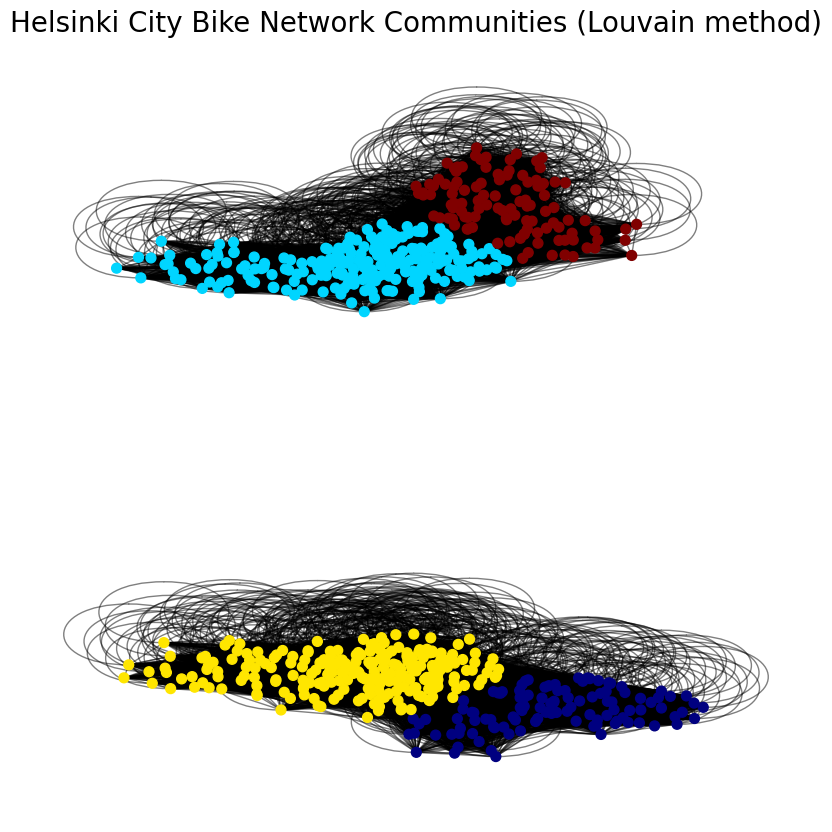

In [82]:
import community as community_louvain

def communityLouvain(G):
    fig, ax = plt.subplots(figsize=(10,10))
    partition = community_louvain.best_partition(G, resolution=0.95, random_state=1)
    pos = nx.spring_layout(bike_network_graph)
    cmap = cm.get_cmap('tab20b', max(partition.values()) + 1)
    community_colors = [partition[node] for node in G.nodes]
    nx.draw_networkx_edges(bike_network_graph, pos, alpha=0.5)
    nx.draw_networkx_nodes(bike_network_graph, pos, cmap=plt.cm.jet, node_color=community_colors, node_size=50)
    ax.set_title('Helsinki City Bike Network Communities (Louvain method)', fontdict={"fontsize":20}, pad = 15)
    ax.axis('off')
    plt.show()
communityLouvain(bike_network_graph)

We can see that 4 different communities are formed. This suggests that there are four primary areas or zones in Helsinki where bike trips are more frequent and concentrated.

### Combo Method


In [83]:
!pip install pycombo

<ipython-input-84-e932f5fcd852>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20b', max(partition.values()) + 1)


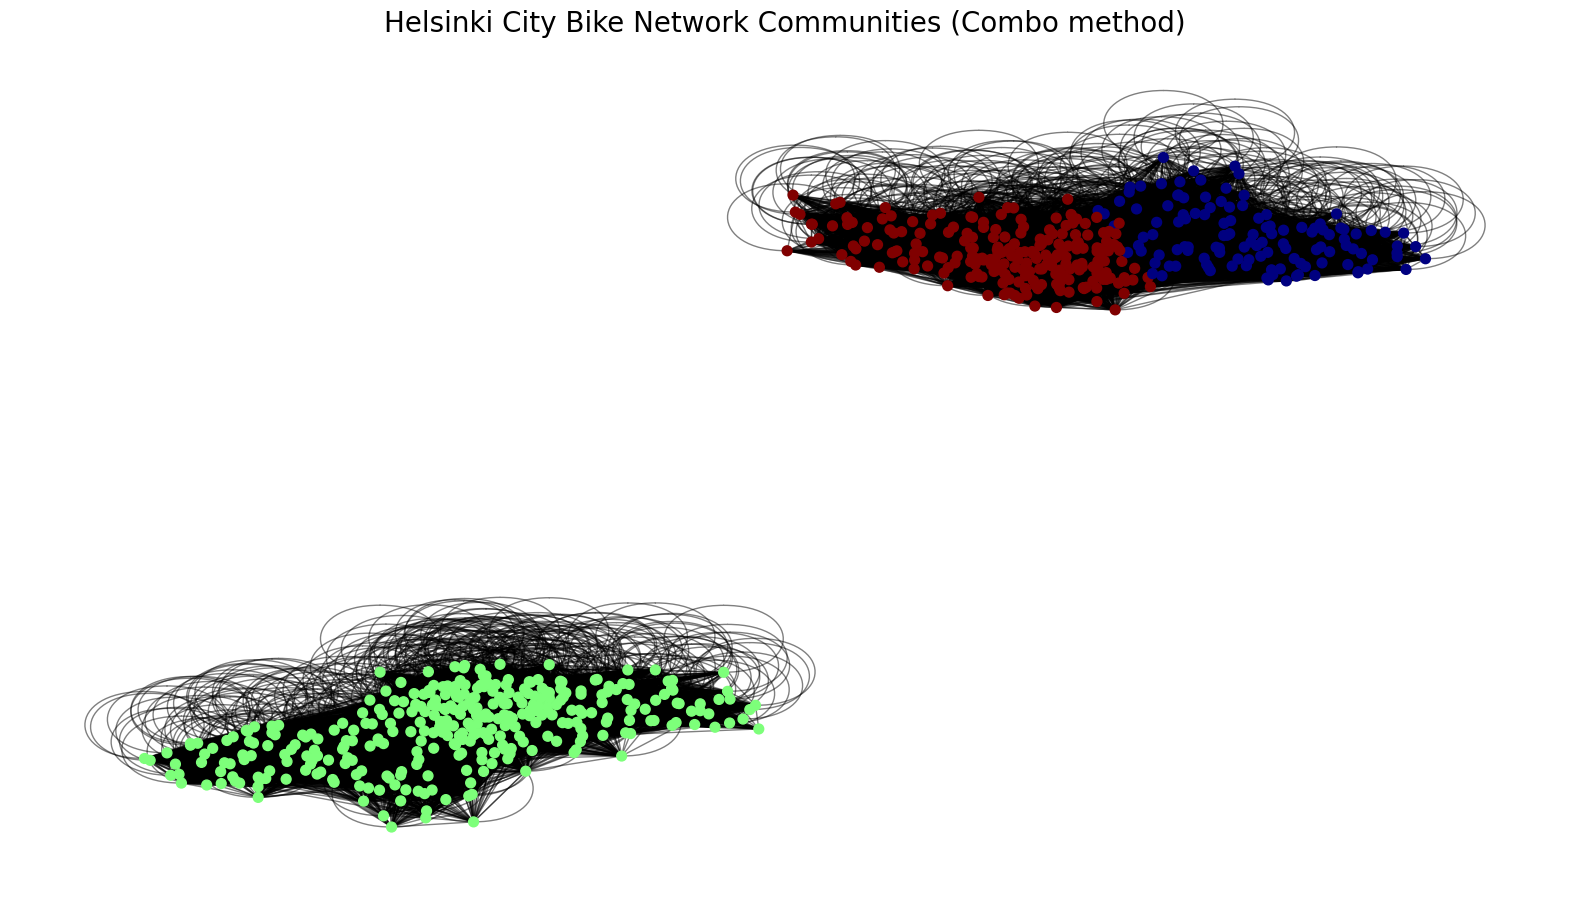

In [84]:
import pycombo
def communityCombo(G):

    pos = nx.spring_layout(bike_network_graph)
    fig, ax = plt.subplots(figsize=(20,11))

    partition, modularity = pycombo.execute(G, return_modularity=True, modularity_resolution= 1,  weight="duration", max_communities=4, random_seed=1)
    community_colors = [partition[node] for node in G.nodes]
    cmap = cm.get_cmap('tab20b', max(partition.values()) + 1)
    nx.draw_networkx_edges(bike_network_graph, pos, alpha=0.5)
    nx.draw_networkx_nodes(bike_network_graph, pos, cmap=plt.cm.jet, node_color=community_colors, node_size=50)
    ax.set_title('Helsinki City Bike Network Communities (Combo method)', fontdict={"fontsize":20}, pad = 15)
    ax.axis('off')
    plt.show()

communityCombo(bike_network_graph)

We can see that combo method divided the bike network into 3 communities.

## Expected Outcome

### Policy Recommendations

> See project Report for this



### Strategic Insights for Optimization
> See project Report for this

### Methodology Framework
The notebook can be used as a framework for analysis while just changing the dataset.
This includes:


1.   Preprocessing
2.   EDA including external factor analysis, analyzing peak times.
3.   Drawing dataset as a network and analysing centrality and degree measures.
4.   Motif Detection
5.   Community Detection.
6.   Recommendations based on the network analysis


